In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

2024-04-13 16:26:28.097813: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-13 16:26:28.097953: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-13 16:26:28.266900: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step
Dataset:
  Number of images: 50000
  Image dimensions: (32, 32, 3) 



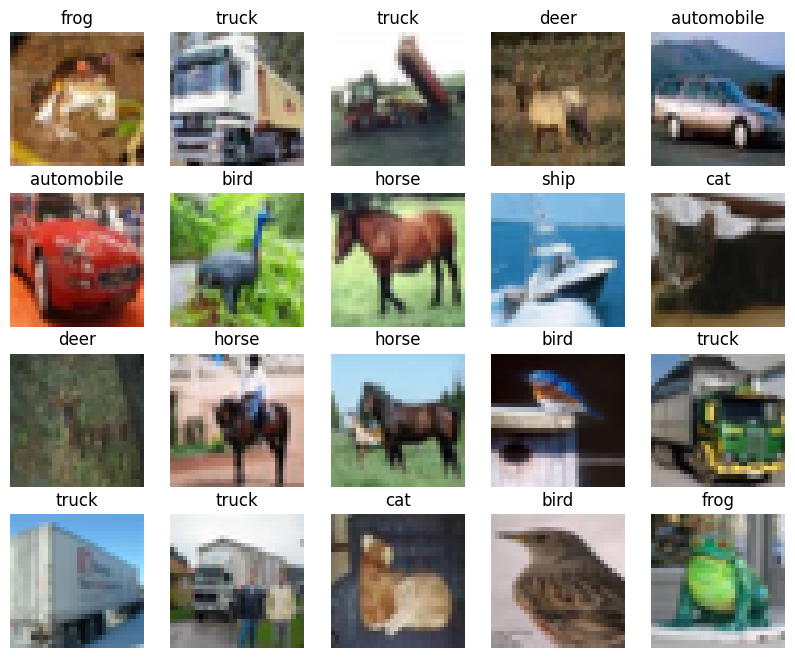

In [2]:
# Load CIFAR-10 dataset from Keras
(X, y), _ = keras.datasets.cifar10.load_data()

# Class names for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']

# Show dataset shapes
print("Dataset:")
print("  Number of images:", X.shape[0])
print("  Image dimensions:", X.shape[1:], "\n")

# Display a few sample images with labels
plt.figure(figsize=(10, 8))
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(X[i])
    plt.title(class_names[y[i, 0]])
    plt.axis('off')
plt.show()

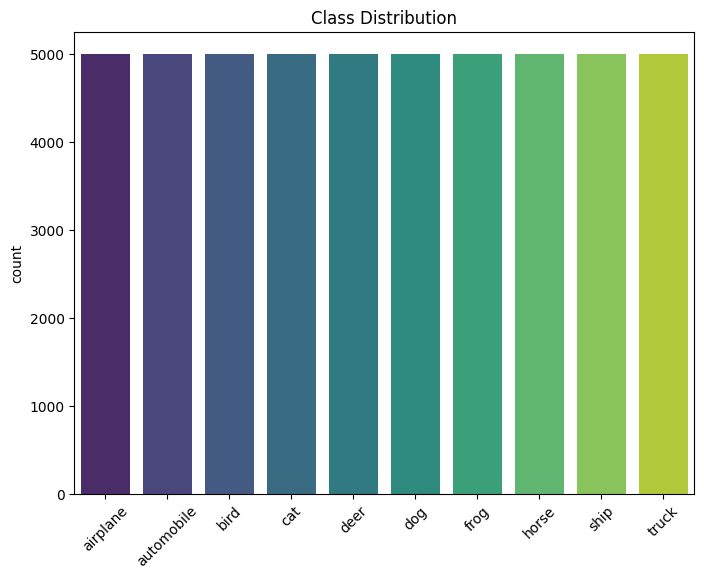

In [3]:
# Plot class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x=y.flatten(), palette='viridis')
plt.title('Class Distribution')
plt.xticks(ticks=np.arange(10), labels=class_names, rotation=45)
plt.show()

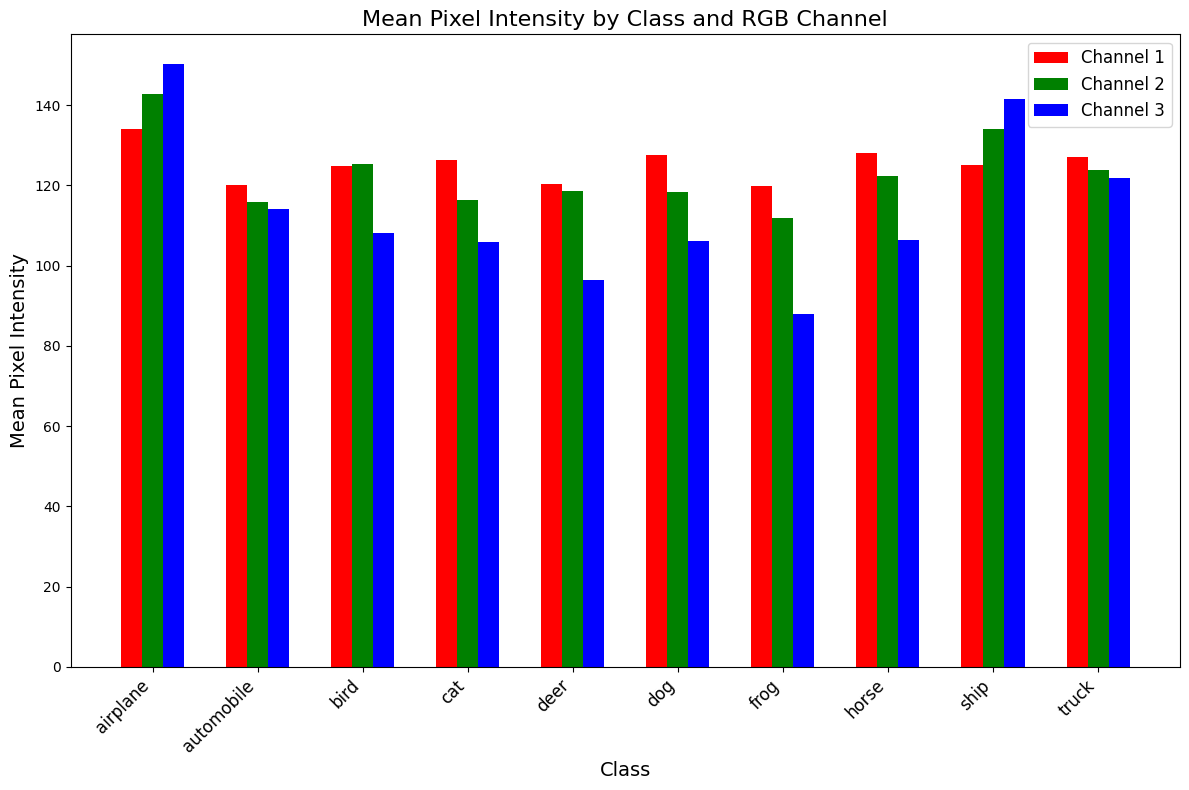

In [19]:
# Calculate mean pixel intensity for each class
class_means = []
for i in range(10):
    # Filter images for current class
    class_images = X[y.flatten() == i]
    
    # Calculate mean intensity over all pixels for the class
    if len(class_images) > 0:
        mean_intensity = np.mean(class_images, axis=(0, 1, 2))
    else:
        mean_intensity = np.zeros((3,))  # If no images for the class, use zero intensity
    
    class_means.append(mean_intensity)

# Convert to NumPy array for plotting
class_means = np.array(class_means)

# Number of classes
num_classes = len(class_names)

# RGB color names for plotting
colors = ['red', 'green', 'blue']

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))

# Plot bars for each class and each RGB channel
bar_width = 0.2
bar_positions = np.arange(num_classes)
for j in range(3):  # Loop over RGB channels
    ax.bar(bar_positions + j * bar_width, class_means[:, j], width=bar_width, color=colors[j], label=f'Channel {j + 1}')

# Customize plot appearance
ax.set_xticks(bar_positions + bar_width)  # Set x ticks to center bars
ax.set_xticklabels(class_names, rotation=45, ha='right', fontsize=12)
ax.set_xlabel('Class', fontsize=14)
ax.set_ylabel('Mean Pixel Intensity', fontsize=14)
ax.set_title('Mean Pixel Intensity by Class and RGB Channel', fontsize=16)
ax.legend(loc='upper right', fontsize=12)

# Show plot
plt.tight_layout()
plt.show()

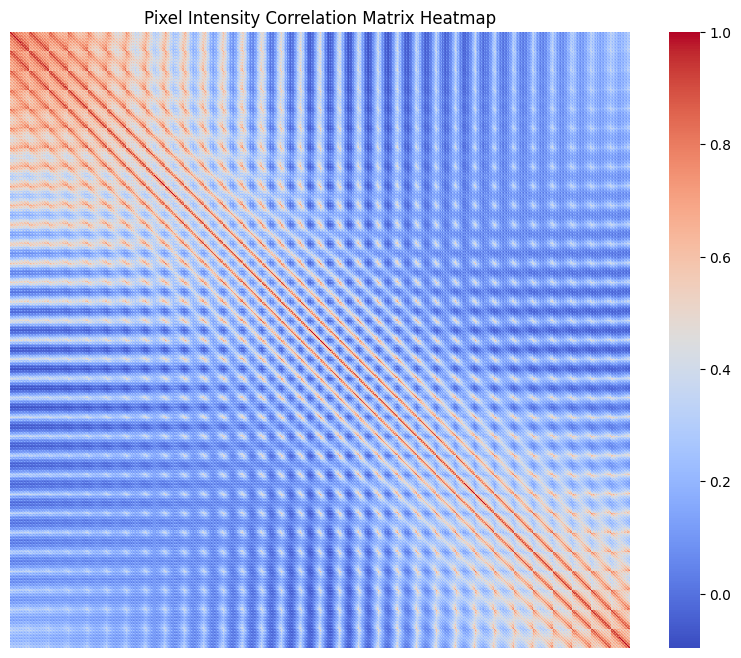

In [5]:
# Flatten images for correlation analysis
X_flat = X.reshape(X.shape[0], -1)

# Calculate correlation matrix
correlation_matrix = np.corrcoef(X_flat, rowvar=False)

# Plot correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', xticklabels=False, yticklabels=False)
plt.title('Pixel Intensity Correlation Matrix Heatmap')
plt.show()

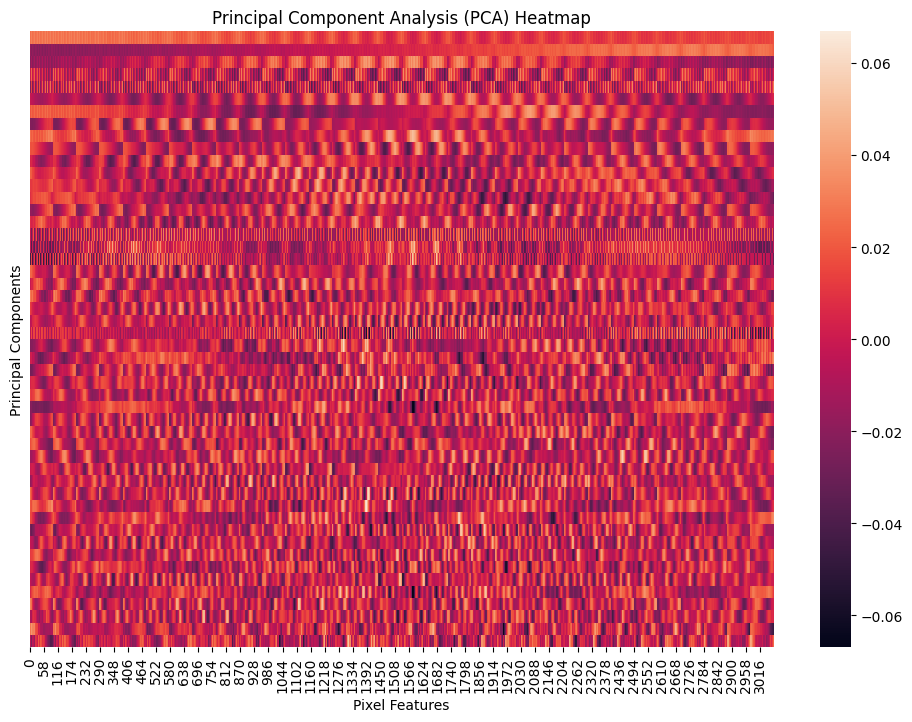

In [6]:
from sklearn.decomposition import PCA

# Perform PCA on flattened images
pca = PCA(n_components=50)
X_pca = pca.fit_transform(X_flat)

# Plot heatmap of PCA components
plt.figure(figsize=(12, 8))
sns.heatmap(pca.components_, yticklabels=False)
plt.title('Principal Component Analysis (PCA) Heatmap')
plt.xlabel('Pixel Features')
plt.ylabel('Principal Components')
plt.show()

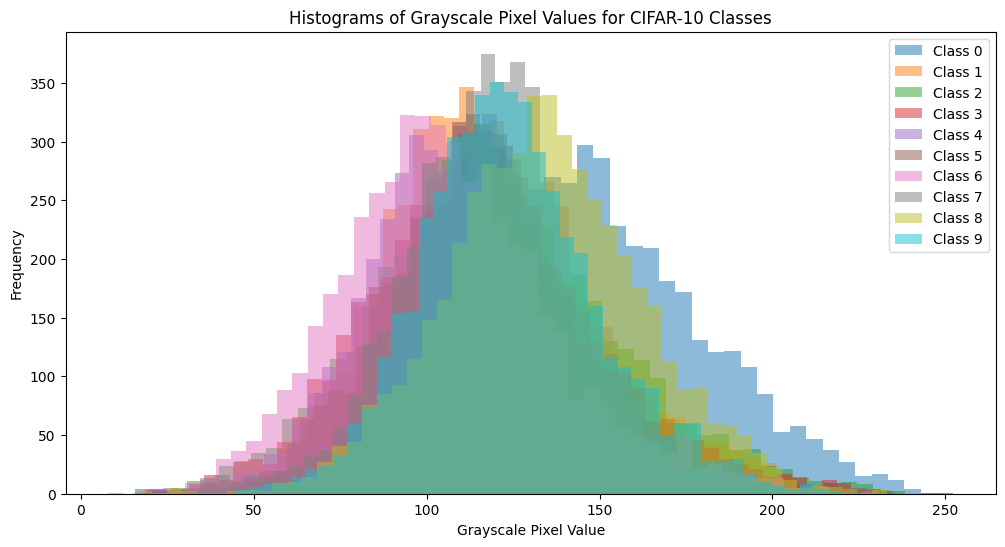

In [7]:
# Calculate grayscale pixel values (average of RGB channels)
grayscale_values = np.mean(X, axis=(1, 2, 3))

# Plot histograms of grayscale pixel values for different classes
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.hist(grayscale_values[y.flatten() == i], bins=50, alpha=0.5, label=f'Class {i}')
plt.title('Histograms of Grayscale Pixel Values for CIFAR-10 Classes')
plt.xlabel('Grayscale Pixel Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()